# Introduction to Pandas 2, Excercise Answers


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set()

from IPython.display import display
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "../week_2/babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
154542,CA,F,2001,Amiya,13
194131,CA,F,2011,Ainsley,61
339474,CA,M,2001,Codey,6
65860,CA,F,1972,Debora,26
221576,CA,F,2018,Rosa,92


## Grouping

More careful look at the most popular 2018 name in California.
In last weeks tasks for popular names, we didn't take into account the unlikely possibility that the most popular name was actually spread across both birth sexes. For example, what if in the table below it turns out that there were 300 female Noahs born in CA in 2018. In that case, Noah would actually be the most popular.

Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [3]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413


Try to add a single line to the operation above so that each row represents the sum of male and female babies born in 2018 with that name. To do this, fill in the ??? below.

In [4]:
(
babynames[babynames["Year"] == 2018]
    .groupby("Name")
    .agg(sum)
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,Year,Count
Name,,
Emma,2018,2743
Noah,4036,2581
Mia,2018,2499
Olivia,2018,2465
Liam,2018,2413


Can you make a table that lists the #1 names for the years 2000-2010?

How many  babys in total were born in 1940? in 2020?

Try ploting this use .plot() instead of selecting a year

Before we were looking at the differences in popularity.  Considering the total numbers of babys born does this have any implications for how we should inpterpret our previous analysis above? 

Can you make a plot of the number of unique names given over the years?

What other things can you think of?   Try and think of a question. 

In [5]:
#Can you make a table that lists the #1 names for the years 2000-2010?

yearsToSelect = (babynames["Year"]>=2000) & (babynames["Year"]<=2010)

babynamesSorted=babynames[yearsToSelect].sort_values("Count", ascending=False)

babynamesSorted.groupby("Year").first()

,State,Sex,Name,Count
Year,,,,
2000,CA,M,Daniel,4342
2001,CA,M,Daniel,4165
2002,CA,M,Daniel,4132
2003,CA,M,Daniel,4033
2004,CA,M,Daniel,4170
2005,CA,M,Daniel,3914
2006,CA,M,Daniel,3830
2007,CA,M,Daniel,3869
2008,CA,M,Daniel,3754


In [6]:
babynames[yearsToSelect].groupby(["Year","Name"]).agg(sum)

Count
Year Name          
2000 Aakash       6
     Aaliyah    120
     Aamir        5
     Aaron     1362
     Aarushi      7
...             ...
2010 Zyan         6
     Zyanna       5
     Zyanya       9
     Zylah        6
     Zyon         6

[71533 rows x 1 columns]

In [7]:
#How many  babys in total were born in 1940? 
#Method 1
babynames.groupby(["Year"]).agg(sum).loc[1940]




Count    102620
Name: 1940, dtype: int64

In [ ]:
#in 2020?
babynames.groupby(["Year"]).agg(sum).loc[2020]


In [ ]:
#How many  babys in total were born in 1940? 
#Method 2
total = babynames.loc[babynames['Year'] == 1940, 'Count'].sum()
print(total)

<AxesSubplot:xlabel='Year'>

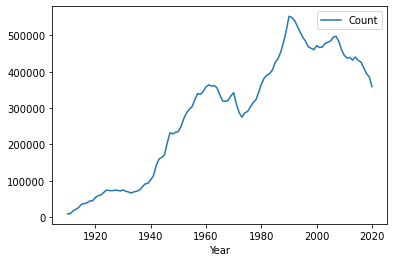

In [8]:
#Try ploting this use .plot() instead of selecting a year
babynames.groupby(["Year"]).agg(sum).plot()

In [12]:
#Can you make a plot of the number of unique names given over the years?

babynames.groupby(['Year','Sex'])['Name'].nunique()

Year  Sex
1910  F       233
      M       130
1911  F       251
      M       142
1912  F       303
             ... 
2018  M      2852
2019  F      3654
      M      2856
2020  F      3593
      M      2770
Name: Name, Length: 222, dtype: int64

<AxesSubplot:xlabel='Year'>

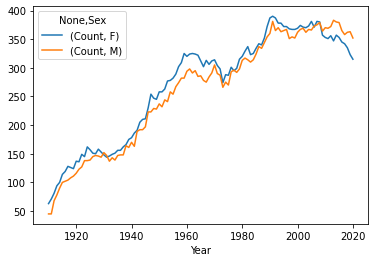

In [13]:
# If you want to do the unique names with more complicated breakdowns a pivot table can be useful.
# in order to translate from the groubpy() aggregating functions you need to pass into the pivot table the full specification
# in this case we want to use the nunique() function that is part of the Series datatype that is included in PANDAS (pd)
# building that up we use:   pd.Series.nunique
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=pd.Series.nunique, # group operation
)
babynames_pivot.plot()